# Data Collection And Exploaratory Data Analysis

Link to DataSet: https://www.kaggle.com/datasets/razamh/pubg-dataset

# Importing Libraries and Loading dataset

## Data fields

- DBNOs- Number of enemy players knocked.
- assists- Number of enemy players this player damaged that were killed by teammates.
- boosts - Number of boost items used.
- damageDealt- Total damage dealt. Note: Self inflicted damage is subtracted.
- headshotKills- Number of enemy players killed with headshots.
- heals- Number of healing items used.
- Id- Player’s Id
- killPlace- Ranking in match of number of enemy players killed.
- killPoints- Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- killStreaks- Max number of enemy players killed in a short amount of time.
- kills - Number of enemy players killed.
- longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- matchDuration - Duration of match in seconds.
- matchId - ID to identify matches. There are no matches that are in both the training and testing set.
- matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- rankPoints - Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes the place of “None”.
- revives - Number of times this player revived teammates.
- rideDistance - Total distance traveled in vehicles measured in meters.
- roadKills - Number of kills while in a vehicle.
- swimDistance - Total distance traveled by swimming measured in meters.
- teamKills - Number of times this player killed a teammate.
- vehicleDestroys - Number of vehicles destroyed.
- walkDistance - Total distance traveled on foot measured in meters.
- weaponsAcquired - Number of weapons picked up.
- winPoints - Win-based external ranking of players. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- numGroups - Number of groups we have data for in the match.
- maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the - - match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('./data/data.csv')
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


# UnderStanding Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [4]:
df.isnull().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [5]:
df.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


In [6]:
df.describe(include='object')

,Id,groupId,matchId,matchType
count,1111742,1111742,1111742,1111742
unique,1111742,870622,47951,16
top,9beb0064c56445,14d6b54cdec6bc,f7182fcc0d8cc8,squad-fpp
freq,1,17,42,438781


In [7]:
df.shape

(1111742, 30)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.value_counts()

Unnamed: 0  Id              groupId         matchId         assists  boosts  damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  kills  killStreaks  longestKill  matchDuration  matchType  maxPlace  numGroups  rankPoints  revives  rideDistance  roadKills  swimDistance  teamKills  vehicleDestroys  walkDistance  weaponsAcquired  winPoints  winPlacePerc
4446964     cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a  0        4       180.40       1      1              2      11         0           2      1            98.500       1373           squad-fpp  26        25          1418       2        0.0           0          0.000         0          0                2748.0        8                0          0.8000          1
6           95959be0e21ca3  2c485a1ad3d0f1  a8274e903927a2  0        0       0.00         0      0              0      96         1262        0      0            0.000        1316           squad-fpp  28        28         -1          0        0.0           0       

In [10]:
df.nunique()

Unnamed: 0         1111742
Id                 1111742
groupId             870622
matchId              47951
assists                 16
boosts                  23
damageDealt          23831
DBNOs                   31
headshotKills           26
heals                   55
killPlace              100
killPoints            1489
kills                   49
killStreaks             15
longestKill          24433
matchDuration         1263
matchType               16
maxPlace               100
numGroups              100
rankPoints            1707
revives                 20
rideDistance         24564
roadKills               11
swimDistance         20702
teamKills                7
vehicleDestroys          6
walkDistance         32651
weaponsAcquired         75
winPoints             1160
winPlacePerc          2557
dtype: int64

# Target Column

In [11]:
df['winPlacePerc']

0          0.0667
1          0.5862
2          0.8105
3          0.5556
4          0.6429
            ...  
1111737    0.3929
1111738    0.8542
1111739    0.7174
1111740    0.9000
1111741    1.0000
Name: winPlacePerc, Length: 1111742, dtype: float64

# EDA And More

In [12]:
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


## Reemoving Unnecessary columns

In [13]:
df.drop(columns = ['Unnamed: 0', 'Id', 'groupId', 'matchId', 'numGroups', 'maxPlace'], axis = 1, inplace = True)

In [14]:
df.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,25.93,0,0,0,84,1437,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,0,0,36.71,0,0,0,57,1225,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,0,1,47.73,0,0,0,50,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,0,0,0.00,0,0,0,56,1286,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,0,2,100.00,0,0,3,31,0,1,1,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [15]:
df.tail()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1111737,0,0,70.31,0,0,0,68,0,0,0,...,0,0.0,0,0.000,0,0,799.80,2,0,0.3929
1111738,0,3,334.10,0,0,1,10,0,2,1,...,0,1549.0,0,0.000,0,0,2777.00,7,0,0.8542
1111739,0,0,119.30,1,0,0,25,0,1,1,...,0,0.0,0,0.000,0,0,60.45,1,0,0.7174
1111740,1,4,53.51,1,0,7,45,0,0,0,...,1,3610.0,0,0.000,1,0,2209.00,4,0,0.9000
1111741,5,3,607.40,3,0,3,15,1691,2,2,...,0,713.9,0,8.912,0,0,3713.00,5,1611,1.0000


# Removing Null Value

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 24 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   assists          1111742 non-null  int64  
 1   boosts           1111742 non-null  int64  
 2   damageDealt      1111742 non-null  float64
 3   DBNOs            1111742 non-null  int64  
 4   headshotKills    1111742 non-null  int64  
 5   heals            1111742 non-null  int64  
 6   killPlace        1111742 non-null  int64  
 7   killPoints       1111742 non-null  int64  
 8   kills            1111742 non-null  int64  
 9   killStreaks      1111742 non-null  int64  
 10  longestKill      1111742 non-null  float64
 11  matchDuration    1111742 non-null  int64  
 12  matchType        1111742 non-null  object 
 13  rankPoints       1111742 non-null  int64  
 14  revives          1111742 non-null  int64  
 15  rideDistance     1111742 non-null  float64
 16  roadKills        1

In [17]:
df[df['winPlacePerc'].isnull()]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
184895,0,0,0.0,0,0,0,1,0,0,0,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [18]:
df.dropna(inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1111741 entries, 0 to 1111741
Data columns (total 24 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   assists          1111741 non-null  int64  
 1   boosts           1111741 non-null  int64  
 2   damageDealt      1111741 non-null  float64
 3   DBNOs            1111741 non-null  int64  
 4   headshotKills    1111741 non-null  int64  
 5   heals            1111741 non-null  int64  
 6   killPlace        1111741 non-null  int64  
 7   killPoints       1111741 non-null  int64  
 8   kills            1111741 non-null  int64  
 9   killStreaks      1111741 non-null  int64  
 10  longestKill      1111741 non-null  float64
 11  matchDuration    1111741 non-null  int64  
 12  matchType        1111741 non-null  object 
 13  rankPoints       1111741 non-null  int64  
 14  revives          1111741 non-null  int64  
 15  rideDistance     1111741 non-null  float64
 16  roadKills        111174

In [20]:
df.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,25.93,0,0,0,84,1437,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,0,0,36.71,0,0,0,57,1225,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,0,1,47.73,0,0,0,50,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,0,0,0.00,0,0,0,56,1286,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,0,2,100.00,0,0,3,31,0,1,1,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


## Renaming Columns

In [21]:
df.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'rankPoints', 'revives', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [22]:
new_names = {'DBNOs': 'players_knocked', 'damageDealt': 'total_damage', 'killPlace': 'kill_rank' ,'killStreaks': 'max_kills', 'winPlacePerc': 'win_ranking_in_%'}

In [23]:
df.rename(columns = new_names, inplace=True)

In [24]:
df.head()

,assists,boosts,total_damage,players_knocked,headshotKills,heals,kill_rank,killPoints,kills,max_kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,win_ranking_in_%
0,0,0,25.93,0,0,0,84,1437,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,0,0,36.71,0,0,0,57,1225,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,0,1,47.73,0,0,0,50,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,0,0,0.00,0,0,0,56,1286,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,0,2,100.00,0,0,3,31,0,1,1,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


# Checking categorical column

In [25]:
df.select_dtypes(include='object')

,matchType
0,squad-fpp
1,squad-fpp
2,solo-fpp
3,squad-fpp
4,solo
...,...
1111737,squad-fpp
1111738,solo-fpp
1111739,duo
1111740,squad-fpp


In [26]:
df['matchType'].unique()

array(['squad-fpp', 'solo-fpp', 'solo', 'duo', 'duo-fpp', 'squad',
       'normal-squad-fpp', 'normal-duo-fpp', 'normal-solo-fpp',
       'crashfpp', 'crashtpp', 'normal-squad', 'flaretpp', 'flarefpp',
       'normal-duo', 'normal-solo'], dtype=object)

In [27]:
df['matchType'].value_counts()

matchType
squad-fpp           438781
duo-fpp             249927
squad               156573
solo-fpp            133853
duo                  78039
solo                 45679
normal-squad-fpp      4286
crashfpp              1581
normal-duo-fpp        1400
flaretpp               633
normal-solo-fpp        465
flarefpp               180
normal-squad           135
crashtpp                86
normal-solo             75
normal-duo              48
Name: count, dtype: int64

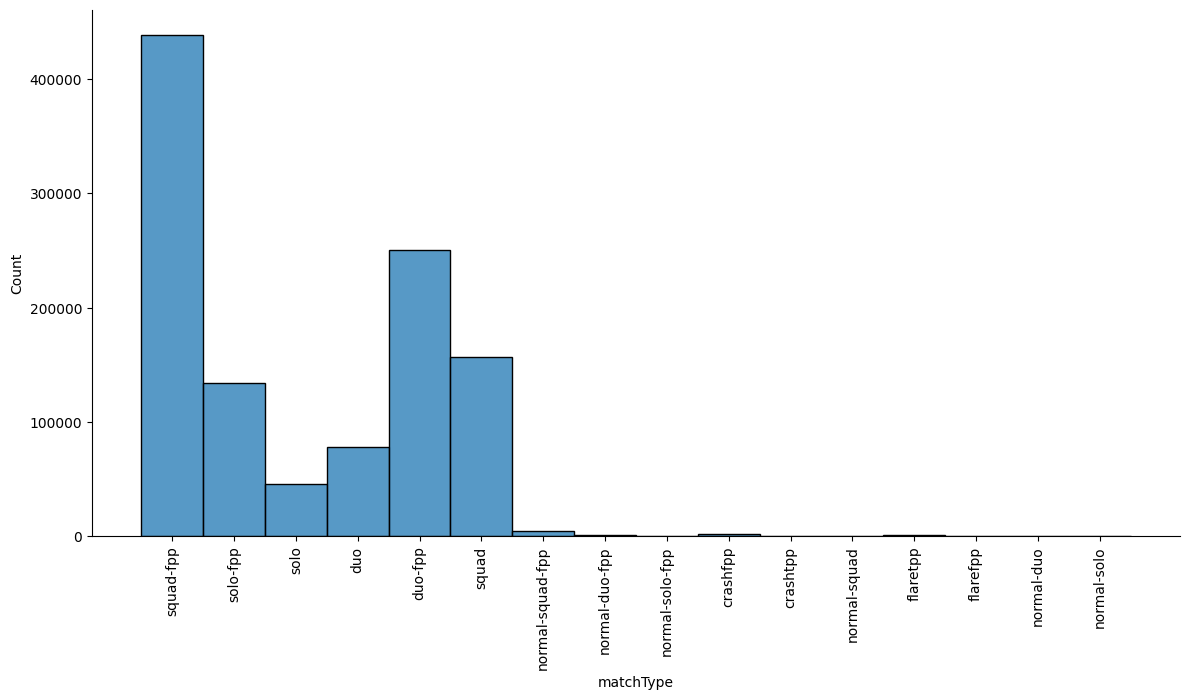

In [28]:
fig = sns.displot(df['matchType'], aspect=2, height=6)
fig.set_xticklabels(rotation=90)
plt.show()

# Checking the correlation

In [29]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
numerical_columns.corr()

,assists,boosts,total_damage,players_knocked,headshotKills,heals,kill_rank,killPoints,kills,max_kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,win_ranking_in_%
assists,1.000000,0.306582,0.409369,0.302200,0.199487,0.228456,-0.289985,0.038331,0.322067,0.243386,...,0.197938,0.110496,0.012366,0.022871,0.007775,0.058241,0.288579,0.244594,0.023340,0.297738
boosts,0.306582,1.000000,0.519600,0.357902,0.331536,0.535387,-0.554047,0.008992,0.499478,0.403484,...,0.254125,0.329281,0.033775,0.107880,0.014645,0.085997,0.639361,0.405301,-0.006973,0.633482
total_damage,0.409369,0.519600,1.000000,0.735084,0.613306,0.341620,-0.676136,0.050217,0.889038,0.703222,...,0.256318,0.139840,0.050660,0.037509,0.016209,0.079900,0.396620,0.354514,0.017989,0.438973
players_knocked,0.302200,0.357902,0.735084,1.000000,0.467393,0.265348,-0.554860,0.042138,0.706211,0.646344,...,0.301098,0.101882,0.035705,0.018726,0.071295,0.059857,0.284050,0.217667,0.010482,0.279322
headshotKills,0.199487,0.331536,0.613306,0.467393,1.000000,0.197936,-0.468080,0.024202,0.673739,0.513207,...,0.149131,0.076274,0.011974,0.029987,0.009198,0.039857,0.249591,0.215612,0.005029,0.276170
heals,0.228456,0.535387,0.341620,0.265348,0.197936,1.000000,-0.385498,-0.001991,0.310537,0.268948,...,0.236400,0.297734,0.023416,0.080991,0.035847,0.062720,0.429283,0.308228,-0.010303,0.427296
kill_rank,-0.289985,-0.554047,-0.676136,-0.554860,-0.468080,-0.385498,1.000000,-0.023595,-0.728968,-0.809671,...,-0.270057,-0.236372,-0.057496,-0.089924,-0.039589,-0.072698,-0.590132,-0.489745,-0.002612,-0.719051
killPoints,0.038331,0.008992,0.050217,0.042138,0.024202,-0.001991,-0.023595,1.000000,0.036511,0.037883,...,0.012730,-0.027882,-0.004503,-0.005820,-0.039932,-0.009321,0.004882,-0.004247,0.983443,0.013089
kills,0.322067,0.499478,0.889038,0.706211,0.673739,0.310537,-0.728968,0.036511,1.000000,0.802054,...,0.253222,0.114664,0.061824,0.039986,0.019248,0.078644,0.373495,0.338190,0.007204,0.418527
max_kills,0.243386,0.403484,0.703222,0.646344,0.513207,0.268948,-0.809671,0.037883,0.802054,1.000000,...,0.241888,0.098000,0.065413,0.034264,0.030051,0.062696,0.326997,0.275110,0.009181,0.376840


<Axes: >

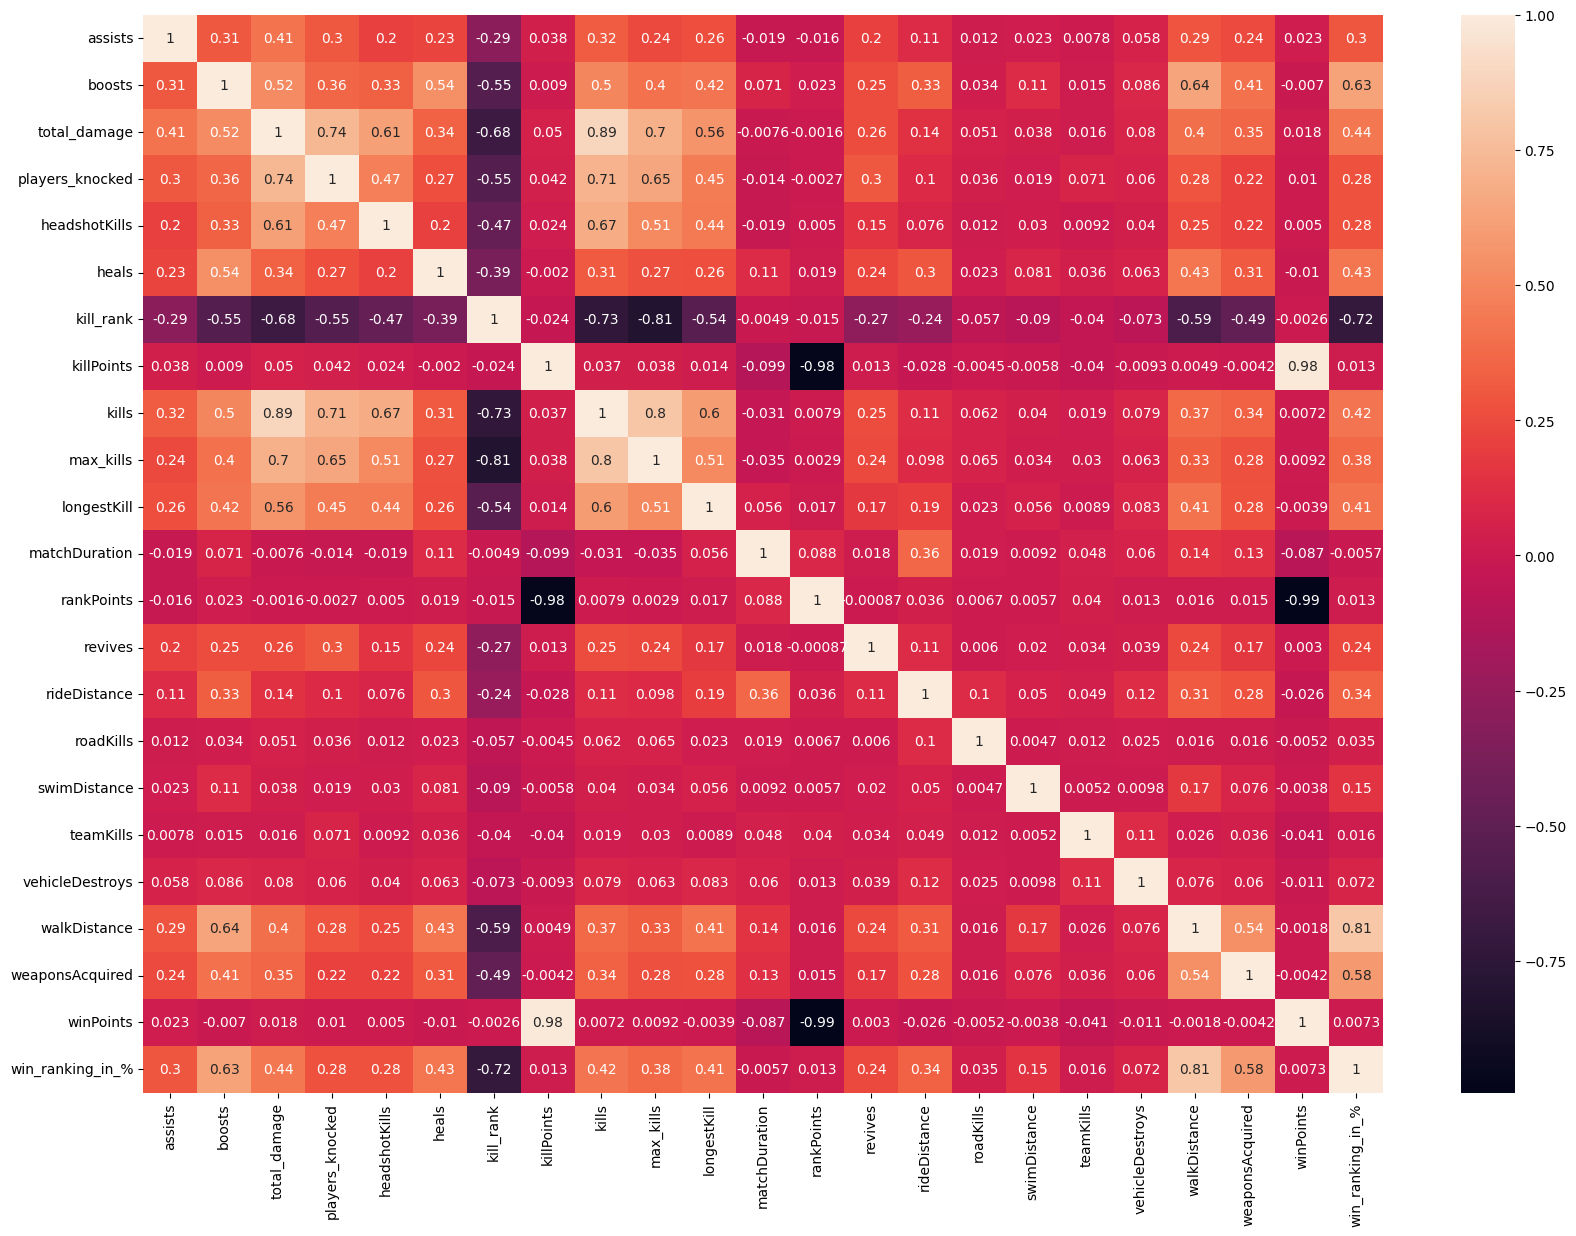

In [30]:
plt.figure(figsize=(20, 14))
sns.heatmap(numerical_columns.corr(), annot=True)

# Finding for Outliers

## Using Boxplot

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'assists'),
  Text(1, 0, 'boosts'),
  Text(2, 0, 'total_damage'),
  Text(3, 0, 'players_knocked'),
  Text(4, 0, 'headshotKills'),
  Text(5, 0, 'heals'),
  Text(6, 0, 'kill_rank'),
  Text(7, 0, 'killPoints'),
  Text(8, 0, 'kills'),
  Text(9, 0, 'max_kills'),
  Text(10, 0, 'longestKill'),
  Text(11, 0, 'matchDuration'),
  Text(12, 0, 'rankPoints'),
  Text(13, 0, 'revives'),
  Text(14, 0, 'rideDistance'),
  Text(15, 0, 'roadKills'),
  Text(16, 0, 'swimDistance'),
  Text(17, 0, 'teamKills'),
  Text(18, 0, 'vehicleDestroys'),
  Text(19, 0, 'walkDistance'),
  Text(20, 0, 'weaponsAcquired'),
  Text(21, 0, 'winPoints'),
  Text(22, 0, 'win_ranking_in_%')])

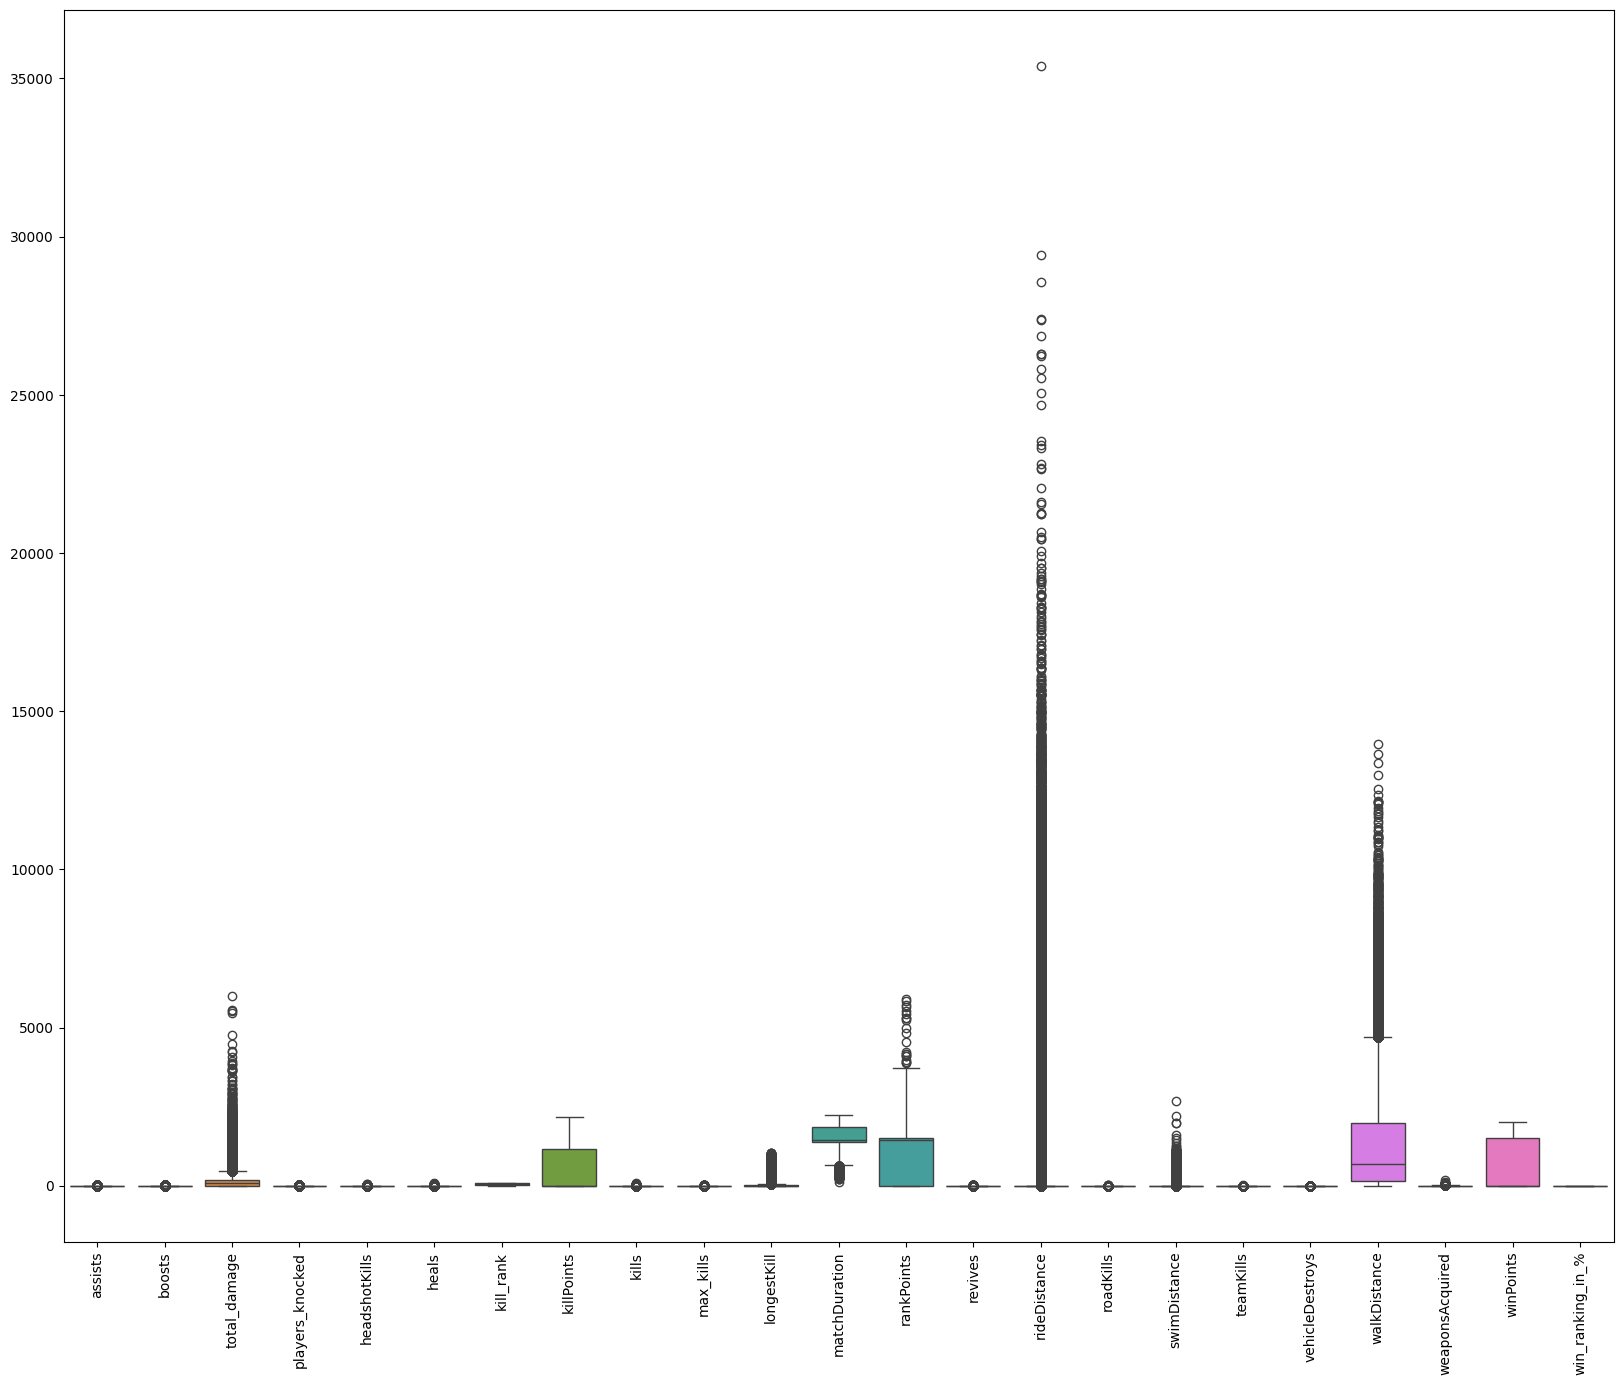

In [31]:
plt.figure(figsize=(20, 16))
sns.boxplot(df)
plt.xticks(rotation=90)

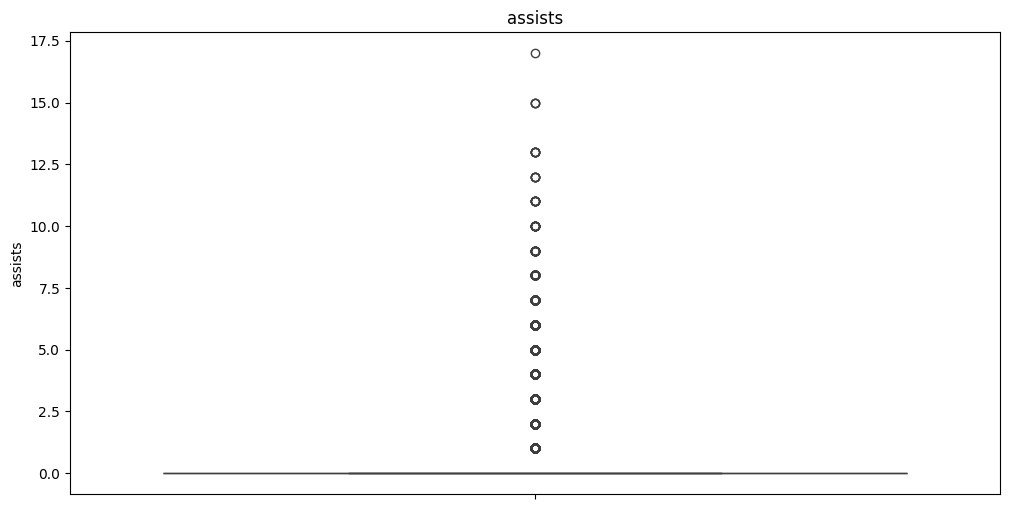

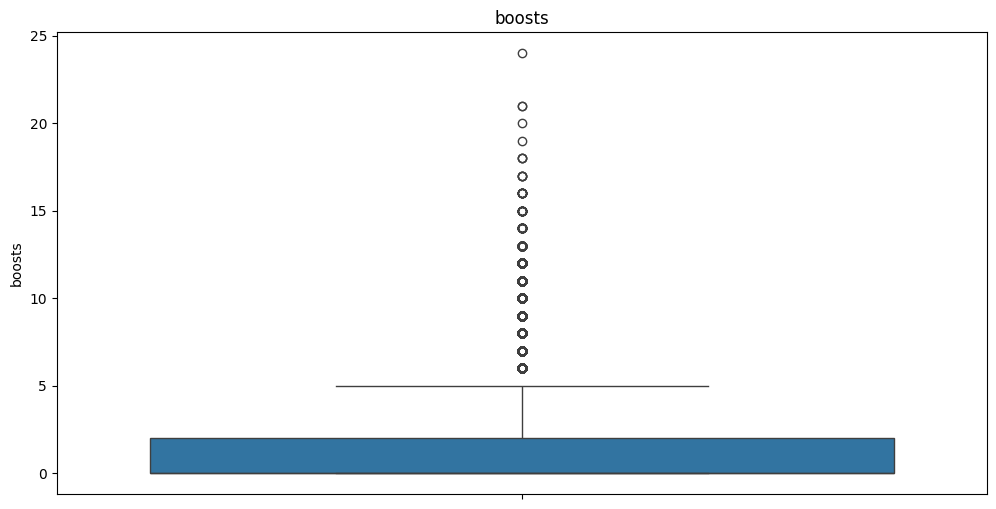

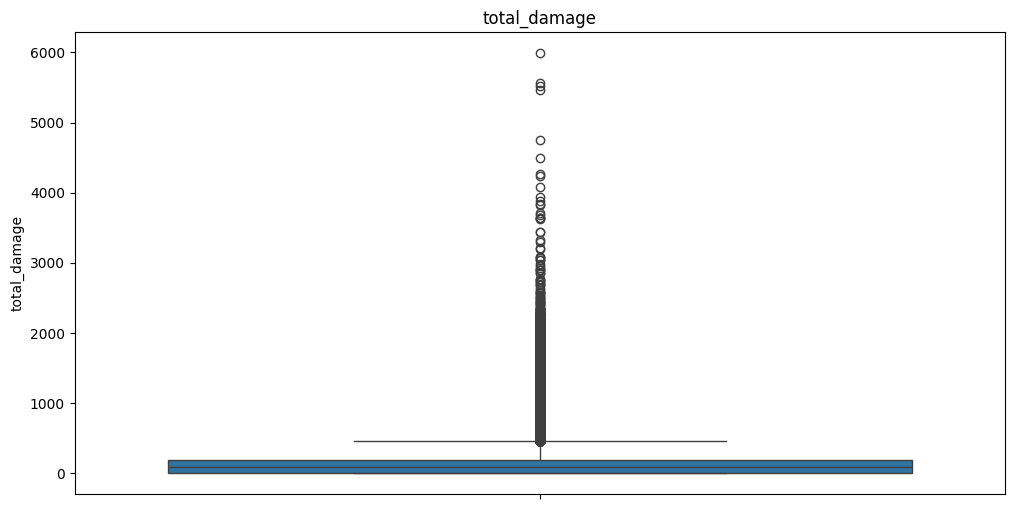

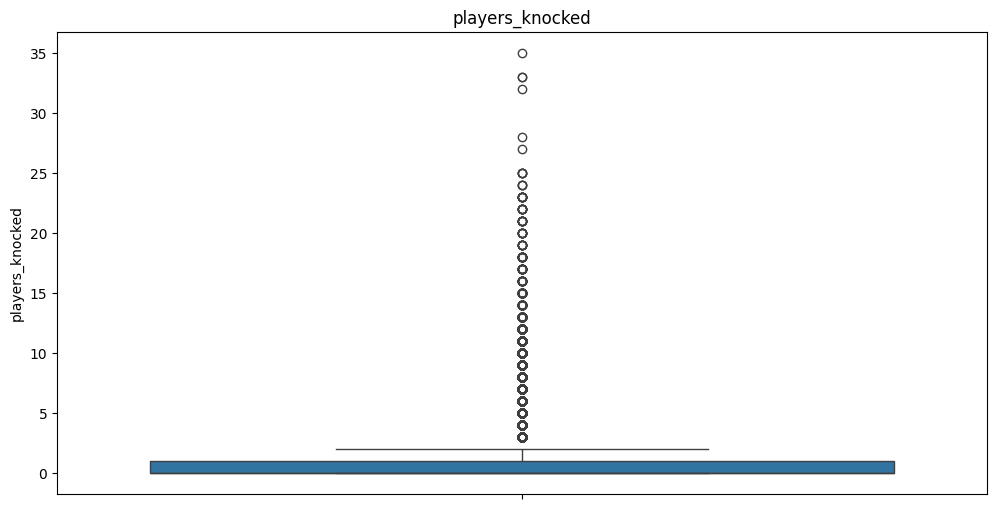

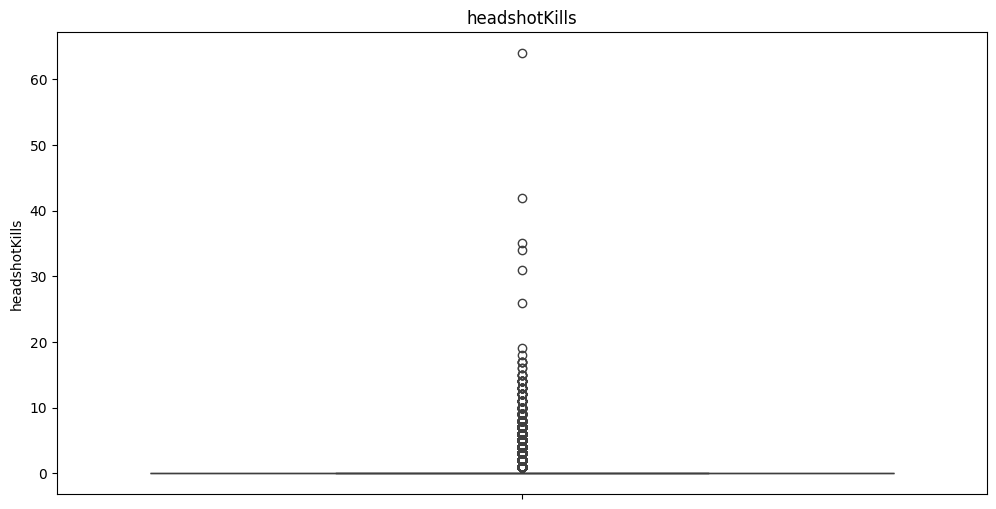

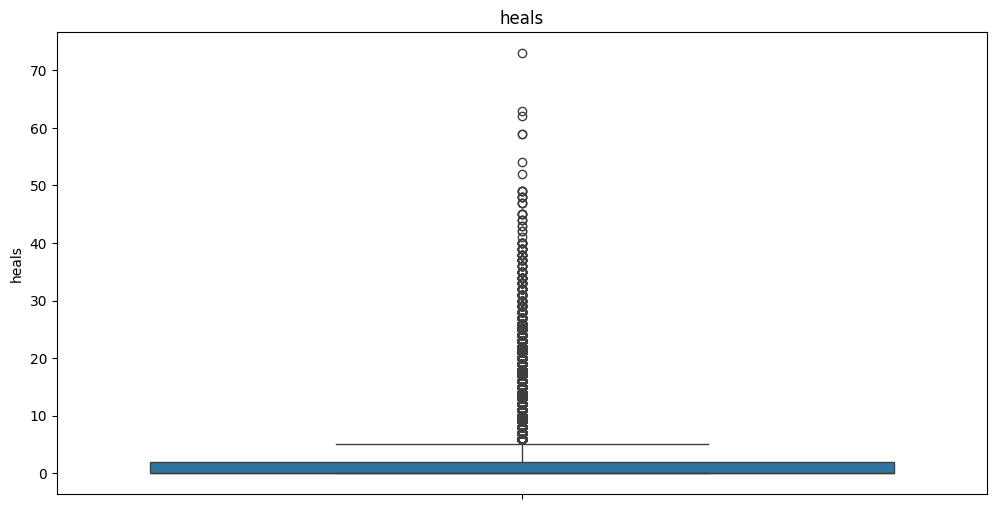

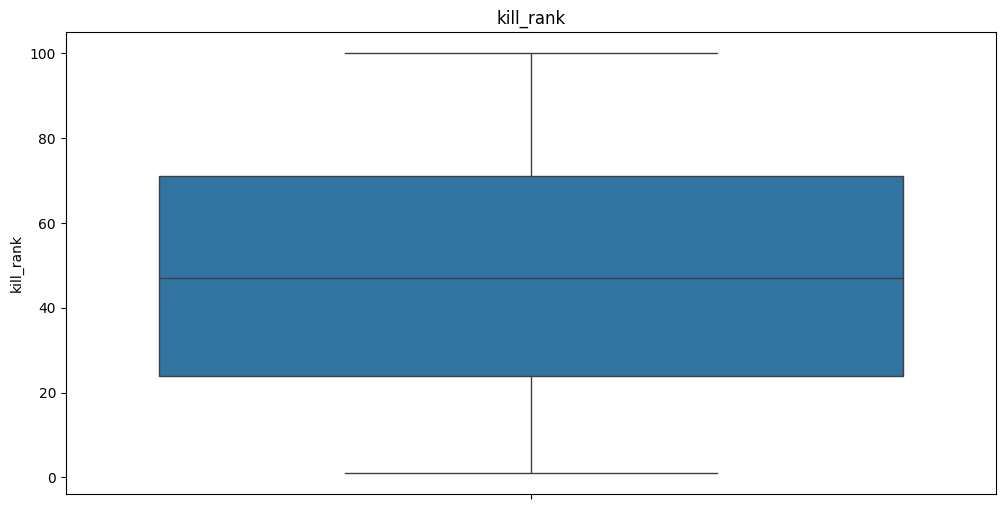

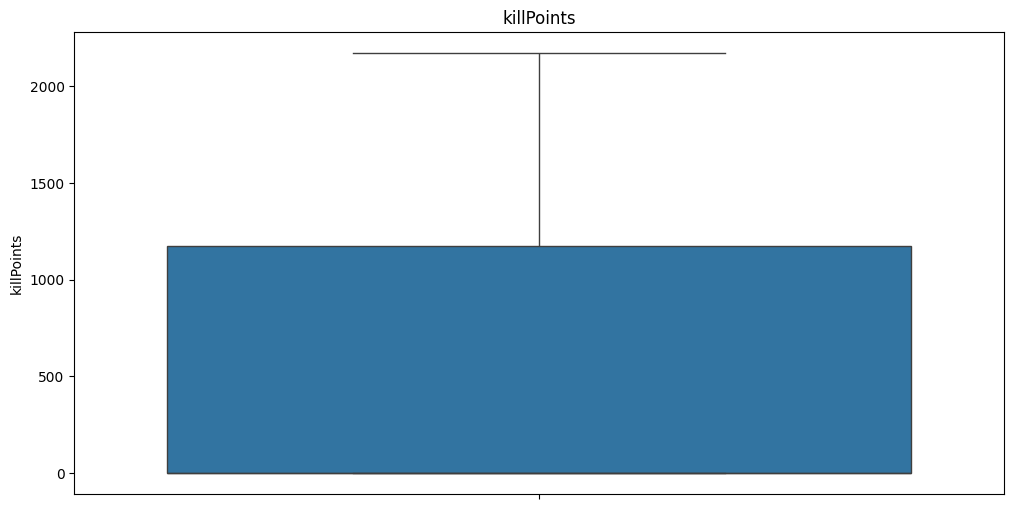

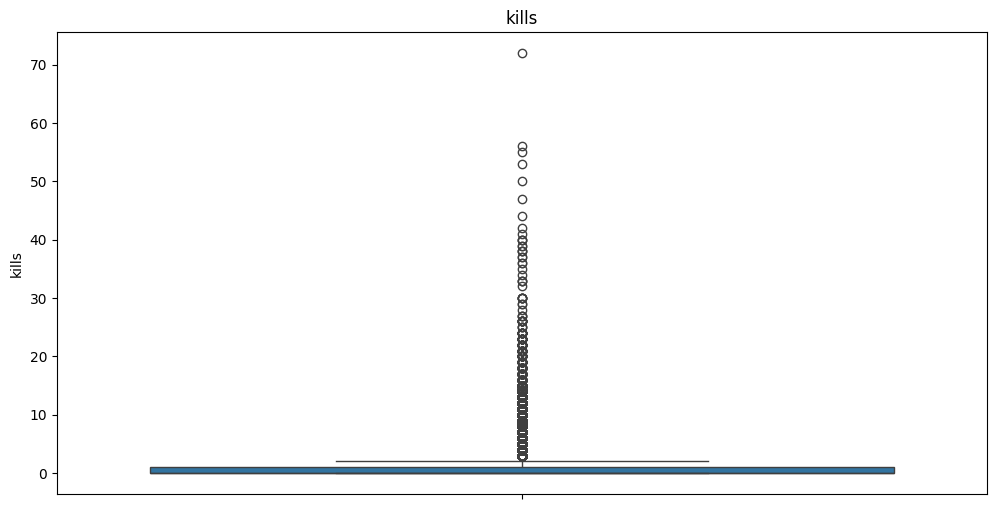

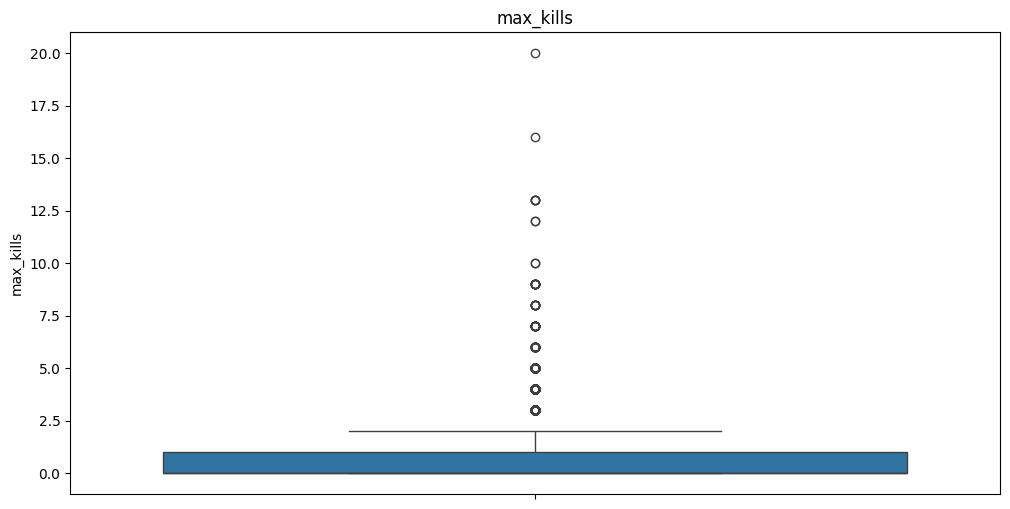

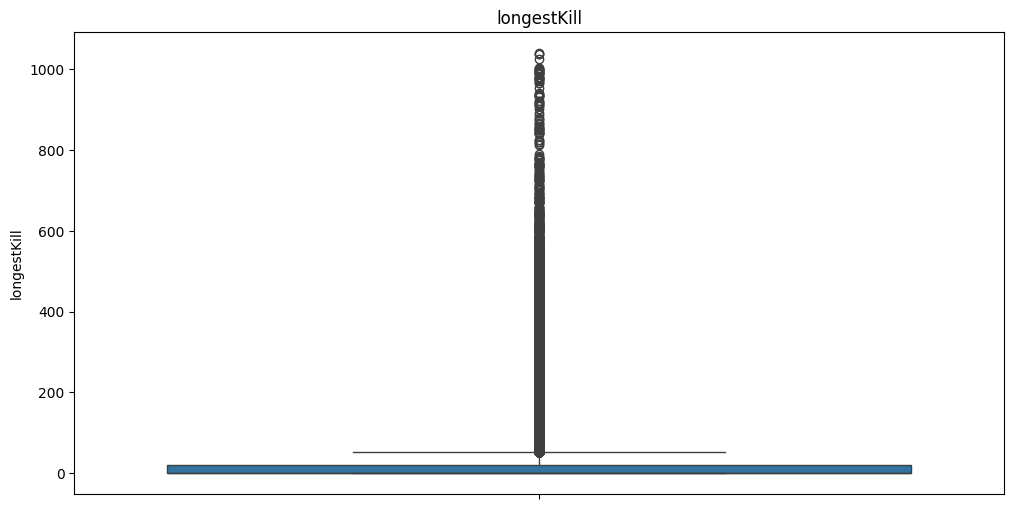

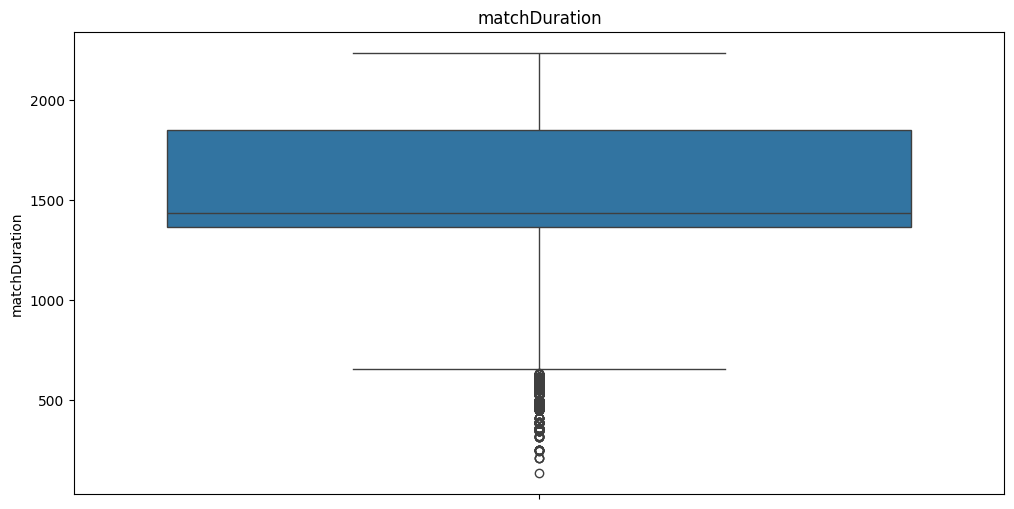

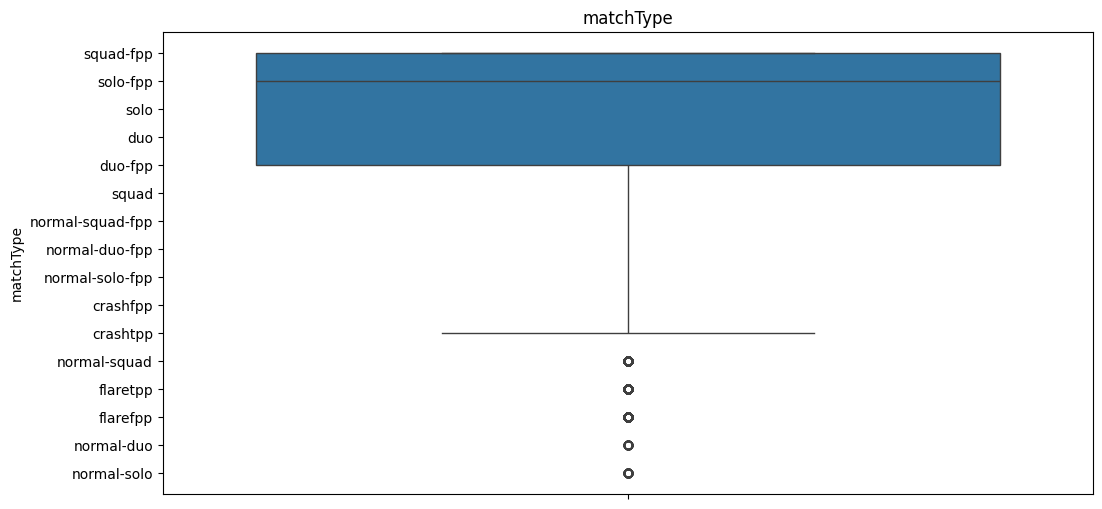

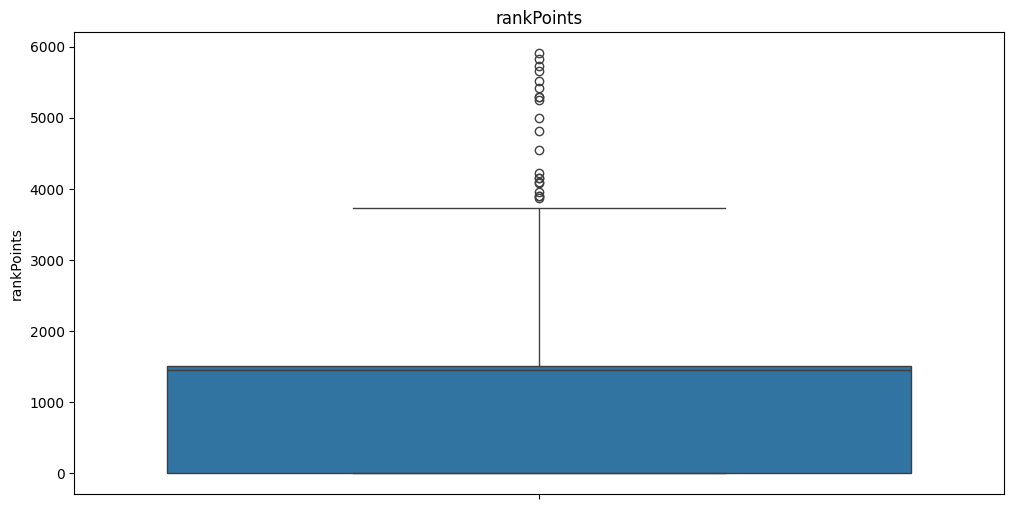

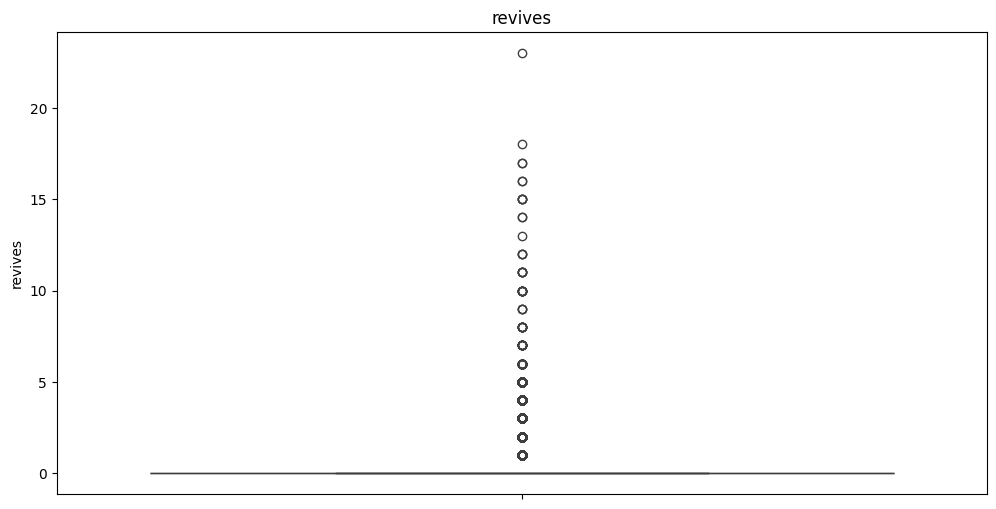

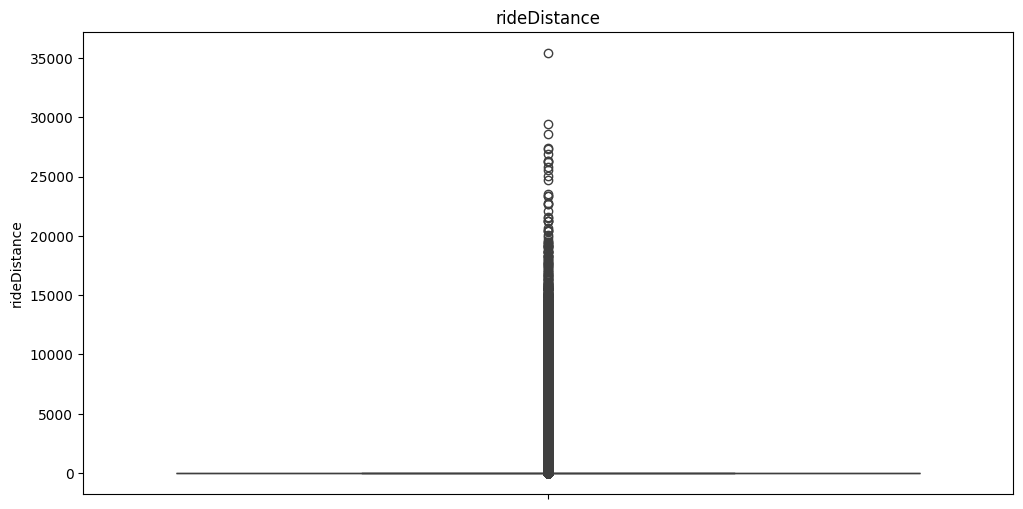

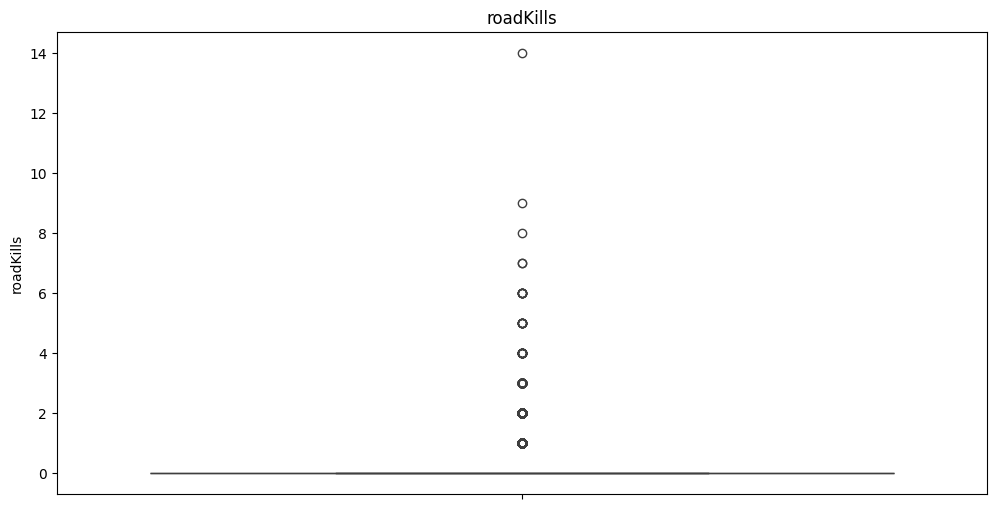

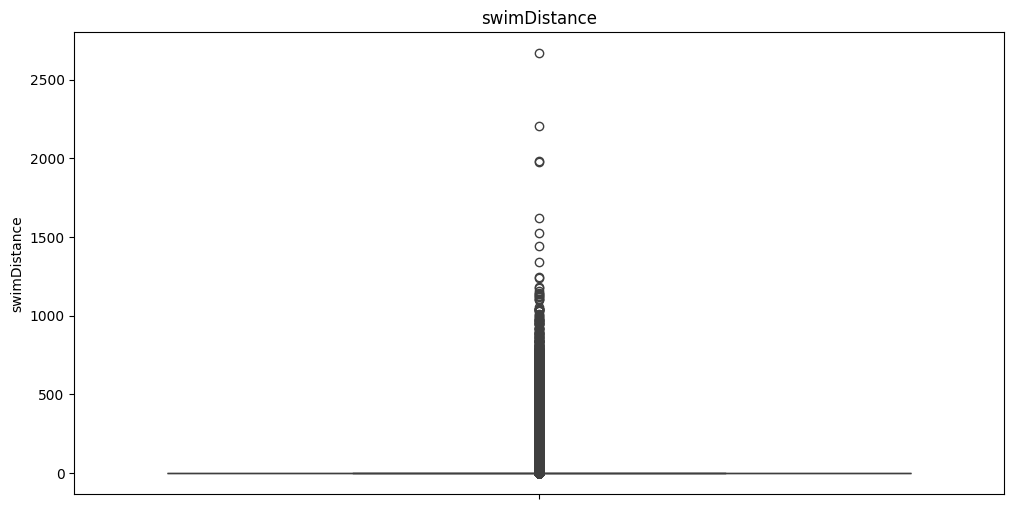

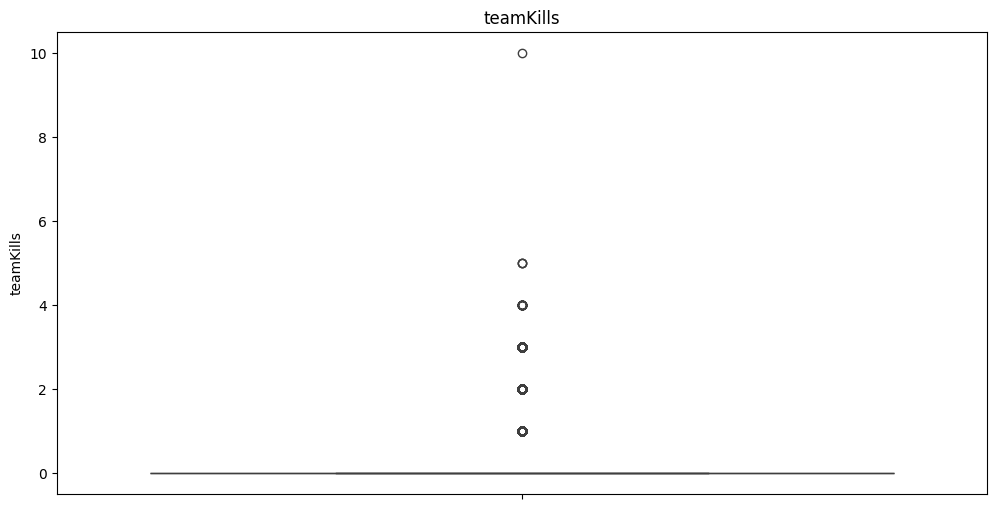

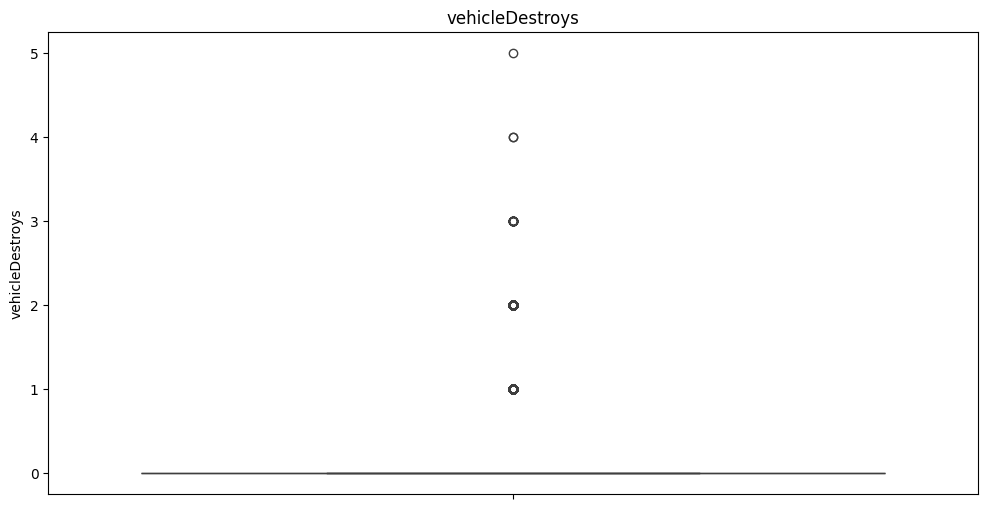

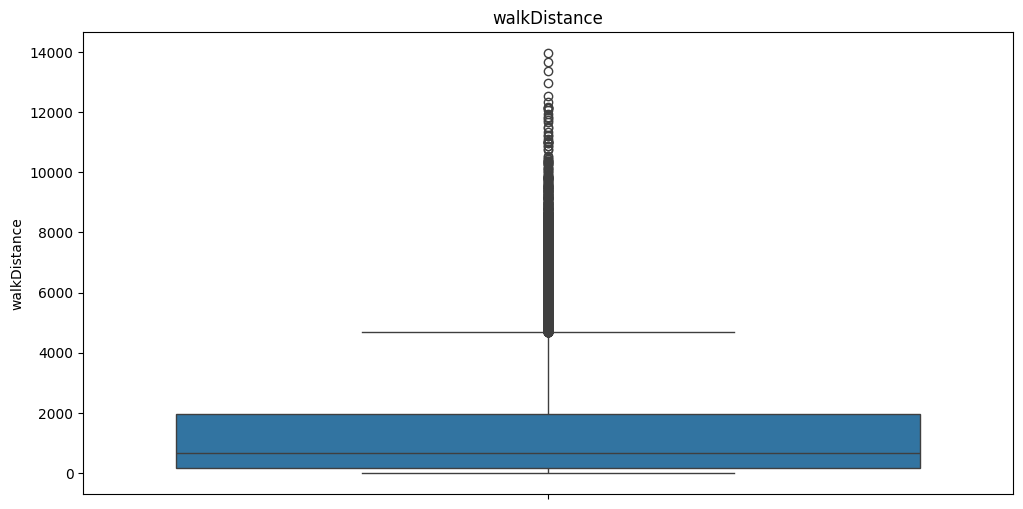

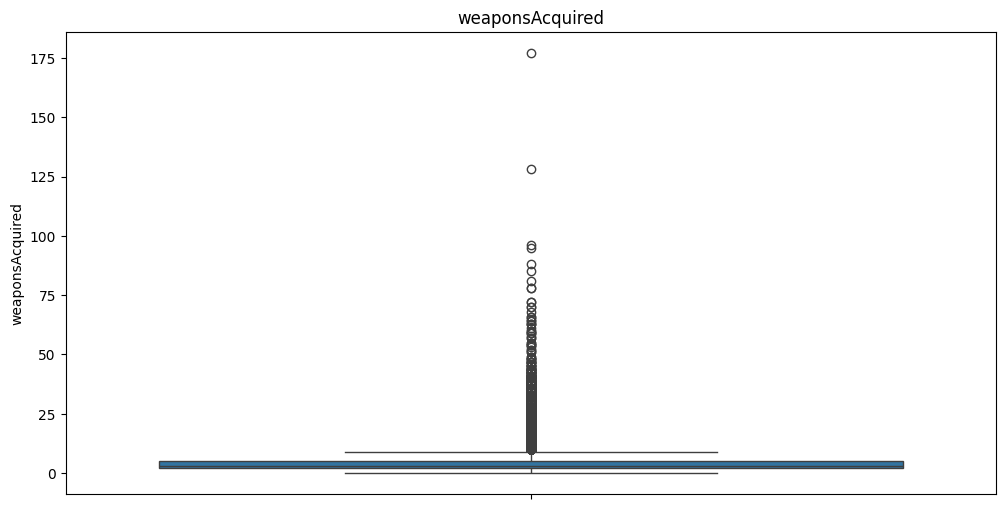

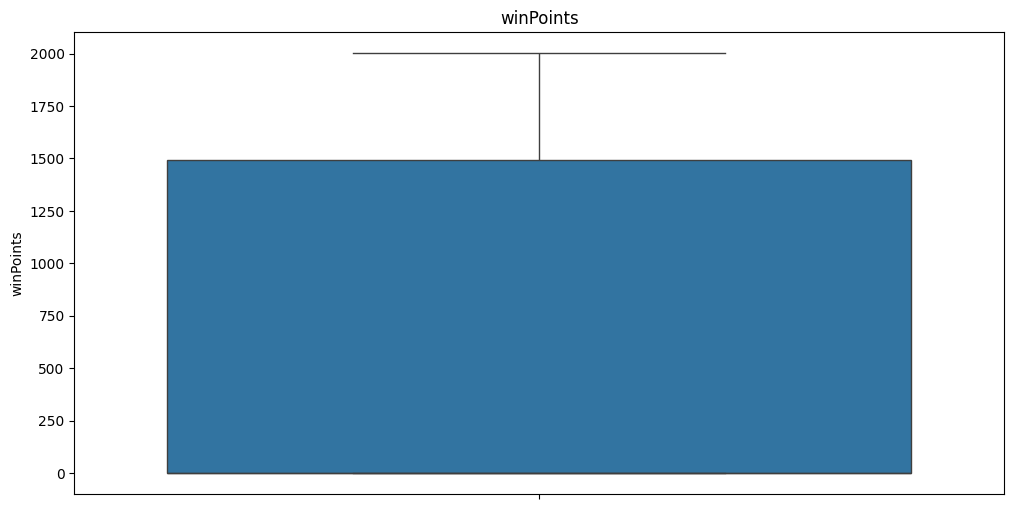

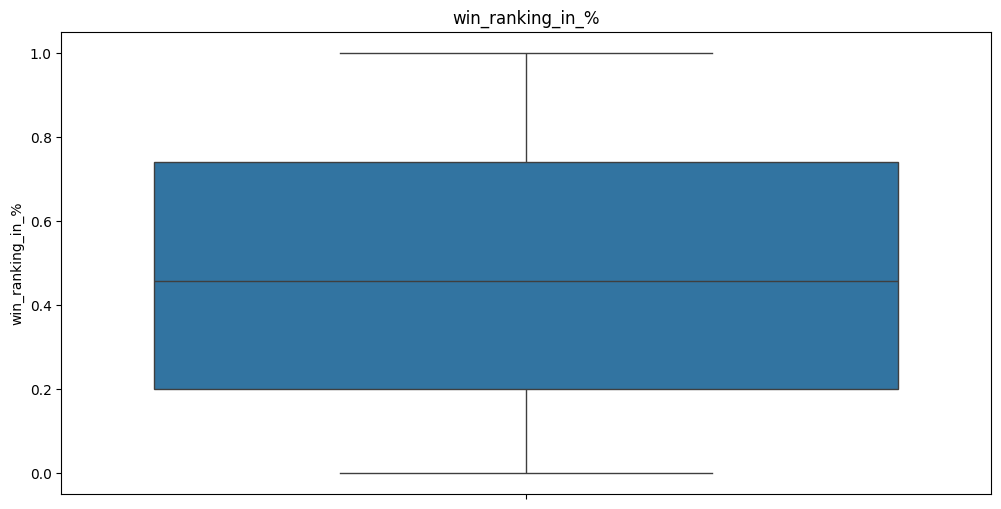

In [32]:
for col in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.show()

## Using IQR

In [33]:
q1 = numerical_columns.quantile(0.25)
q3 = numerical_columns.quantile(0.75)
print(f'Q1: \n{q1}\n \nQ3: \n{q3}')

iqr = q3 - q1
print(f'\nIQR: \n{iqr}')

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr
print(f'\nLower bound: \n{lb}\n \nUpper bound: \n{ub}')

Outliers = numerical_columns[((numerical_columns < lb) | (numerical_columns > ub)).any(axis=1)]
print(f'\nOutliers found: {Outliers.shape[0]} rows')

Q1: 
assists                0.0
boosts                 0.0
total_damage           0.0
players_knocked        0.0
headshotKills          0.0
heals                  0.0
kill_rank             24.0
killPoints             0.0
kills                  0.0
max_kills              0.0
longestKill            0.0
matchDuration       1367.0
rankPoints            -1.0
revives                0.0
rideDistance           0.0
roadKills              0.0
swimDistance           0.0
teamKills              0.0
vehicleDestroys        0.0
walkDistance         155.2
weaponsAcquired        2.0
winPoints              0.0
win_ranking_in_%       0.2
Name: 0.25, dtype: float64
 
Q3: 
assists                0.0000
boosts                 2.0000
total_damage         185.9000
players_knocked        1.0000
headshotKills          0.0000
heals                  2.0000
kill_rank             71.0000
killPoints          1171.0000
kills                  1.0000
max_kills              1.0000
longestKill           21.3300
matchDurat

In [34]:
df.shape

(1111741, 24)

# Checking for skewness

<Figure size 1200x600 with 0 Axes>

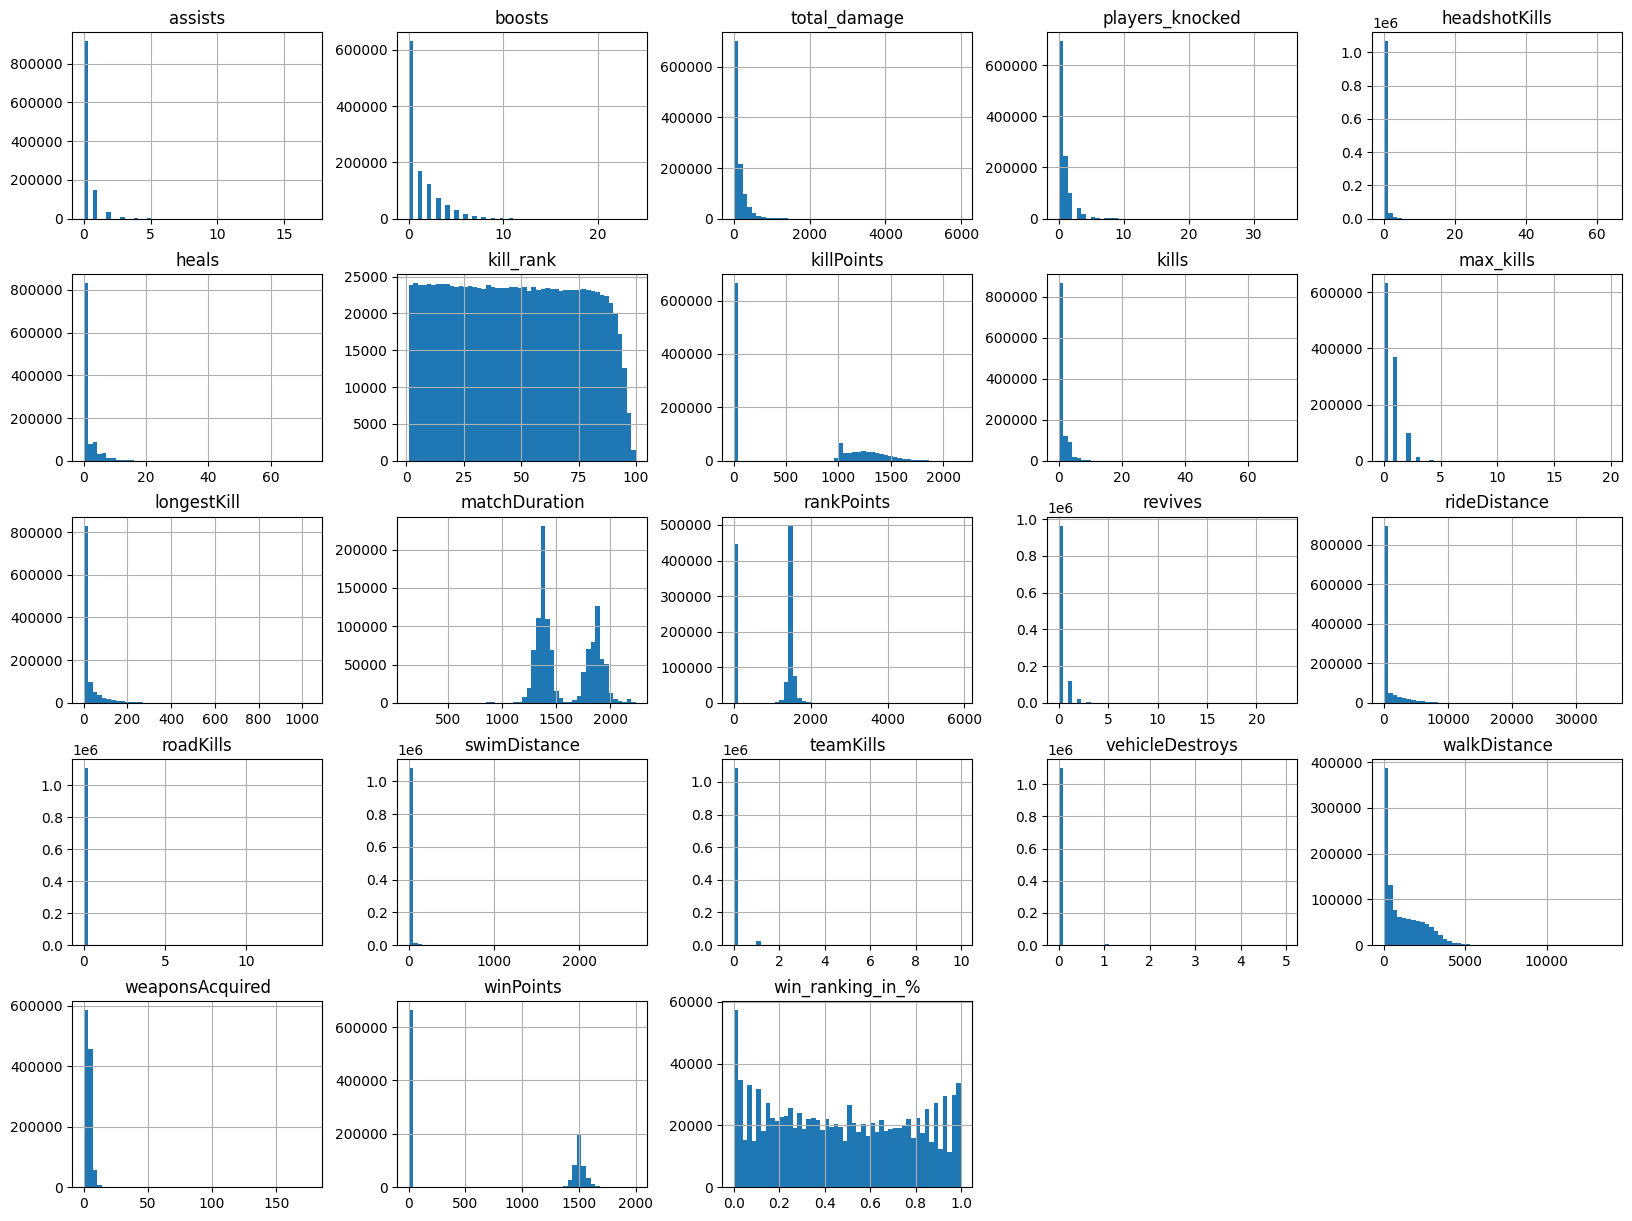

In [35]:
plt.figure(figsize=(12, 6))
numerical_columns.hist(figsize=(20, 15), bins=50)
plt.show()

# Increasing threshold value and checking for outliers

In [36]:
q1 = numerical_columns.quantile(0.25)
q3 = numerical_columns.quantile(0.75)
print(f'Q1: \n{q1}\n \nQ3: \n{q3}')

iqr = q3 - q1
print(f'\nIQR: \n{iqr}')

lb = q1 - 3 * iqr
ub = q3 + 2 * iqr
print(f'\nLower bound: \n{lb}\n \nUpper bound: \n{ub}')

Outliers = numerical_columns[((numerical_columns < lb) | (numerical_columns > ub)).any(axis=1)]
print(f'\nOutliers found: {Outliers.shape[0]} rows')

Q1: 
assists                0.0
boosts                 0.0
total_damage           0.0
players_knocked        0.0
headshotKills          0.0
heals                  0.0
kill_rank             24.0
killPoints             0.0
kills                  0.0
max_kills              0.0
longestKill            0.0
matchDuration       1367.0
rankPoints            -1.0
revives                0.0
rideDistance           0.0
roadKills              0.0
swimDistance           0.0
teamKills              0.0
vehicleDestroys        0.0
walkDistance         155.2
weaponsAcquired        2.0
winPoints              0.0
win_ranking_in_%       0.2
Name: 0.25, dtype: float64
 
Q3: 
assists                0.0000
boosts                 2.0000
total_damage         185.9000
players_knocked        1.0000
headshotKills          0.0000
heals                  2.0000
kill_rank             71.0000
killPoints          1171.0000
kills                  1.0000
max_kills              1.0000
longestKill           21.3300
matchDurat

In [37]:
# Add a constant to shift all values to be non-negative
shift_value = -numerical_columns.min().min() + 1
df_numerical_shifted = numerical_columns + shift_value
df_log_transformed = df_numerical_shifted.apply(lambda x: np.log1p(x))


In [38]:
from scipy import stats

# Shift values if necessary
df_numerical_shifted = numerical_columns + shift_value

# Apply Box-Cox transformation
df_boxcox_transformed = df_numerical_shifted.apply(lambda x: stats.boxcox(x + 1)[0])


In [39]:
df_boxcox_transformed

,assists,boosts,total_damage,players_knocked,headshotKills,heals,kill_rank,killPoints,kills,max_kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,win_ranking_in_%
0,0.065271,0.375038,4.618746,0.247982,0.06268,0.366663,32.322777,3.836136,0.337256,0.288280,...,0.045209,0.814479,0.000972,0.167527,0.006762,0.002232,10.162010,1.390571,3.923124,1.123503
1,0.065271,0.375038,5.214474,0.247982,0.06268,0.366663,24.486054,3.798252,0.337256,0.288280,...,0.045209,0.814479,0.000972,0.167527,0.006762,0.002232,22.713015,2.314400,3.921688,1.280862
2,0.065271,0.388291,5.698894,0.247982,0.06268,0.366663,22.298316,0.986475,0.337256,0.288280,...,0.045209,1.724705,0.000972,0.167527,0.006762,0.002232,17.579977,2.314400,0.989976,1.341896
3,0.065271,0.375038,1.214265,0.247982,0.06268,0.366663,24.178219,3.809912,0.337256,0.288280,...,0.045209,0.814479,0.000972,0.167527,0.006762,0.002232,6.199189,1.101297,3.921527,1.272242
4,0.065271,0.393681,7.225514,0.247982,0.06268,0.386033,15.877406,0.986475,0.346008,0.292742,...,0.045209,1.704932,0.000972,0.167527,0.006762,0.002232,21.995142,2.089074,0.989976,1.296642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111737,0.065271,0.375038,6.468339,0.247982,0.06268,0.366663,27.781137,0.986475,0.337256,0.288280,...,0.045209,0.814479,0.000972,0.167527,0.006762,0.002232,17.445418,1.615204,0.989976,1.225133
1111738,0.065271,0.396326,10.257839,0.247982,0.06268,0.378827,7.313888,0.986475,0.349264,0.292742,...,0.045209,1.713830,0.000972,0.167527,0.006762,0.002232,25.318340,2.314400,0.989976,1.353370
1111739,0.065271,0.375038,7.625865,0.250139,0.06268,0.366663,13.647086,0.986475,0.346008,0.292742,...,0.045209,0.814479,0.000972,0.167527,0.006762,0.002232,7.326371,1.390571,0.989976,1.317008
1111740,0.065271,0.397793,5.919154,0.250139,0.06268,0.388911,20.684370,0.986475,0.337256,0.288280,...,0.045209,1.723625,0.000972,0.167527,0.006762,0.002232,23.678745,1.954344,0.989976,1.365257


<Figure size 1200x600 with 0 Axes>

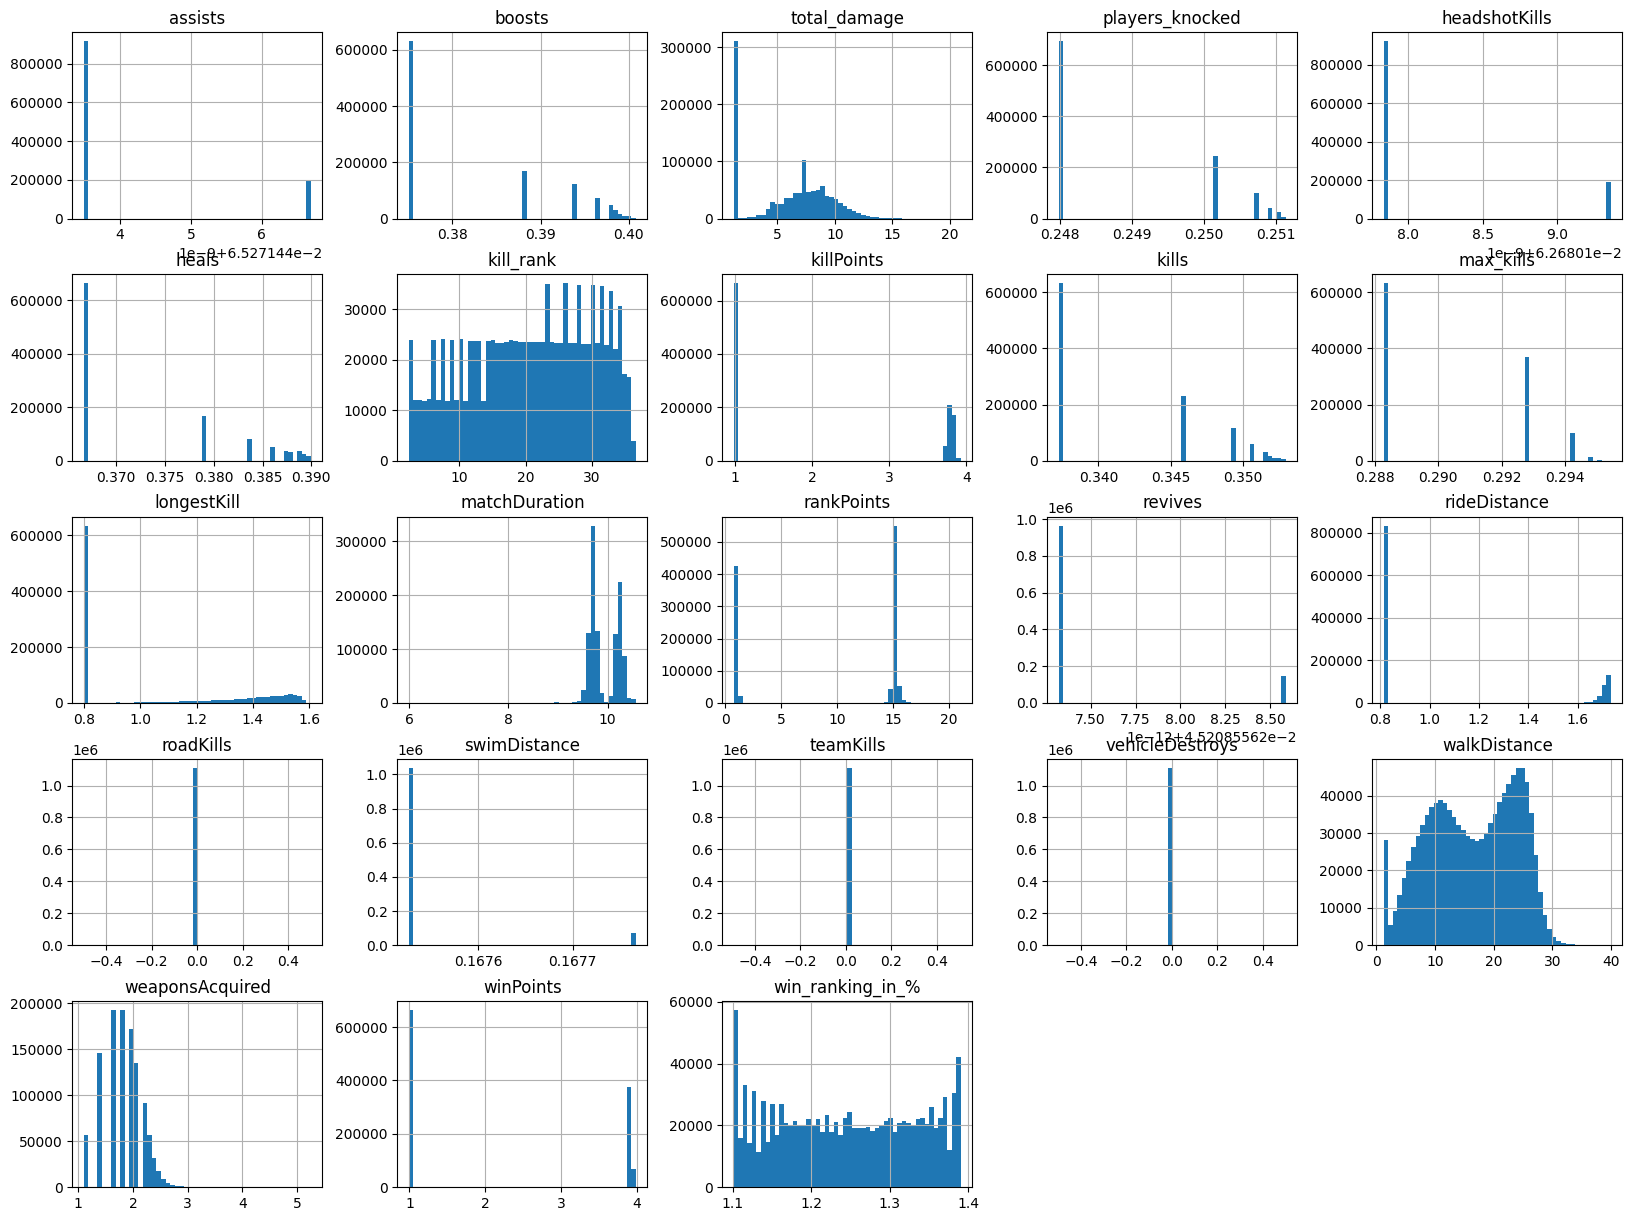

In [40]:
plt.figure(figsize=(12, 6))
df_boxcox_transformed.hist(figsize=(20, 15), bins=50)
plt.show()

In [41]:
q1 = df_boxcox_transformed.quantile(0.25)
q3 = df_boxcox_transformed.quantile(0.75)
print(f'Q1: \n{q1}\n \nQ3: \n{q3}')

iqr = q3 - q1
print(f'\nIQR: \n{iqr}')

lb = q1 - 3 * iqr
ub = q3 + 2 * iqr
print(f'\nLower bound: \n{lb}\n \nUpper bound: \n{ub}')

Outliers = df_boxcox_transformed[((df_boxcox_transformed < lb) | (df_boxcox_transformed > ub)).any(axis=1)]
print(f'\nOutliers found: {Outliers.shape[0]} rows')

Q1: 
assists              0.065271
boosts               0.375038
total_damage         1.214265
players_knocked      0.247982
headshotKills        0.062680
heals                0.366663
kill_rank           13.262516
killPoints           0.986475
kills                0.337256
max_kills            0.288280
longestKill          0.799168
matchDuration        9.695196
rankPoints           0.738571
revives              0.045209
rideDistance         0.814479
roadKills            0.000972
swimDistance         0.167527
teamKills            0.006762
vehicleDestroys      0.002232
walkDistance        10.251196
weaponsAcquired      1.615204
winPoints            0.989976
win_ranking_in_%     1.166276
Name: 0.25, dtype: float64
 
Q3: 
assists              0.065271
boosts               0.393681
total_damage         8.696107
players_knocked      0.250139
headshotKills        0.062680
heals                0.383684
kill_rank           28.653508
killPoints           3.787335
kills                0.346008
m

In [44]:
df_boxcox_transformed['matchType'] = df['matchType']

In [47]:
df_boxcox_transformed

,assists,boosts,total_damage,players_knocked,headshotKills,heals,kill_rank,killPoints,kills,max_kills,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,win_ranking_in_%,matchType
0,0.065271,0.375038,4.618746,0.247982,0.06268,0.366663,32.322777,3.836136,0.337256,0.288280,...,0.814479,0.000972,0.167527,0.006762,0.002232,10.162010,1.390571,3.923124,1.123503,squad-fpp
1,0.065271,0.375038,5.214474,0.247982,0.06268,0.366663,24.486054,3.798252,0.337256,0.288280,...,0.814479,0.000972,0.167527,0.006762,0.002232,22.713015,2.314400,3.921688,1.280862,squad-fpp
2,0.065271,0.388291,5.698894,0.247982,0.06268,0.366663,22.298316,0.986475,0.337256,0.288280,...,1.724705,0.000972,0.167527,0.006762,0.002232,17.579977,2.314400,0.989976,1.341896,solo-fpp
3,0.065271,0.375038,1.214265,0.247982,0.06268,0.366663,24.178219,3.809912,0.337256,0.288280,...,0.814479,0.000972,0.167527,0.006762,0.002232,6.199189,1.101297,3.921527,1.272242,squad-fpp
4,0.065271,0.393681,7.225514,0.247982,0.06268,0.386033,15.877406,0.986475,0.346008,0.292742,...,1.704932,0.000972,0.167527,0.006762,0.002232,21.995142,2.089074,0.989976,1.296642,solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111737,0.065271,0.375038,6.468339,0.247982,0.06268,0.366663,27.781137,0.986475,0.337256,0.288280,...,0.814479,0.000972,0.167527,0.006762,0.002232,17.445418,1.615204,0.989976,1.225133,squad-fpp
1111738,0.065271,0.396326,10.257839,0.247982,0.06268,0.378827,7.313888,0.986475,0.349264,0.292742,...,1.713830,0.000972,0.167527,0.006762,0.002232,25.318340,2.314400,0.989976,1.353370,solo-fpp
1111739,0.065271,0.375038,7.625865,0.250139,0.06268,0.366663,13.647086,0.986475,0.346008,0.292742,...,0.814479,0.000972,0.167527,0.006762,0.002232,7.326371,1.390571,0.989976,1.317008,duo
1111740,0.065271,0.397793,5.919154,0.250139,0.06268,0.388911,20.684370,0.986475,0.337256,0.288280,...,1.723625,0.000972,0.167527,0.006762,0.002232,23.678745,1.954344,0.989976,1.365257,squad-fpp


In [49]:
df_boxcox_transformed.to_csv('./data/Cleaned_data.csv', index = None)